In [129]:
# Import the required libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress
import datetime
import statsmodels.tsa.stattools as ts 
import statsmodels.api as sm

In [130]:
# Download data from yahoo finance for 20 december 2022

BTC = yf.download('BTC-USD', start='2022-12-20', end='2022-12-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [131]:
BTC

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 00:00:00,16441.787109,16441.787109,16441.787109,16441.787109,16441.787109,0
2022-12-20 00:02:00,16454.195312,16454.195312,16454.195312,16454.195312,16454.195312,0
2022-12-20 00:03:00,16452.722656,16452.722656,16452.722656,16452.722656,16452.722656,0
2022-12-20 00:04:00,16451.128906,16451.128906,16451.128906,16451.128906,16451.128906,824320
2022-12-20 00:05:00,16456.138672,16456.138672,16456.138672,16456.138672,16456.138672,0
...,...,...,...,...,...,...
2022-12-20 23:54:00,16901.412109,16901.412109,16901.412109,16901.412109,16901.412109,0
2022-12-20 23:55:00,16902.970703,16902.970703,16902.970703,16902.970703,16902.970703,0
2022-12-20 23:56:00,16902.970703,16902.970703,16902.970703,16902.970703,16902.970703,0


In [132]:
ETH = yf.download('ETH-USD', start='2022-12-20', end='2022-12-21',  interval = '1m')

[*********************100%***********************]  1 of 1 completed


In [133]:
ETH

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-12-20 00:00:00,1167.882690,1167.882690,1167.882690,1167.882690,1167.882690,0
2022-12-20 00:02:00,1168.397583,1168.397583,1168.397583,1168.397583,1168.397583,0
2022-12-20 00:03:00,1168.291016,1168.291016,1168.291016,1168.291016,1168.291016,0
2022-12-20 00:04:00,1168.226440,1168.226440,1168.226440,1168.226440,1168.226440,0
2022-12-20 00:05:00,1168.229492,1168.229492,1168.229492,1168.229492,1168.229492,0
...,...,...,...,...,...,...
2022-12-20 23:54:00,1217.606323,1217.606323,1217.606323,1217.606323,1217.606323,125952
2022-12-20 23:55:00,1217.712646,1217.712646,1217.712646,1217.712646,1217.712646,0
2022-12-20 23:56:00,1217.780640,1217.780640,1217.780640,1217.780640,1217.780640,1236992


In [134]:
BTC = BTC.reset_index()
ETH = ETH.reset_index()

In [135]:
# Rearrange the data to find the common time stamp

BTC = BTC[['Datetime','Adj Close','Open']]

In [136]:
BTC

,Datetime,Adj Close,Open
0,2022-12-20 00:00:00,16441.787109,16441.787109
1,2022-12-20 00:02:00,16454.195312,16454.195312
2,2022-12-20 00:03:00,16452.722656,16452.722656
3,2022-12-20 00:04:00,16451.128906,16451.128906
4,2022-12-20 00:05:00,16456.138672,16456.138672
...,...,...,...
1422,2022-12-20 23:54:00,16901.412109,16901.412109
1423,2022-12-20 23:55:00,16902.970703,16902.970703
1424,2022-12-20 23:56:00,16902.970703,16902.970703
1425,2022-12-20 23:57:00,16902.947266,16902.947266


In [137]:
ETH = ETH[['Datetime','Adj Close','Open']]
ETH

,Datetime,Adj Close,Open
0,2022-12-20 00:00:00,1167.882690,1167.882690
1,2022-12-20 00:02:00,1168.397583,1168.397583
2,2022-12-20 00:03:00,1168.291016,1168.291016
3,2022-12-20 00:04:00,1168.226440,1168.226440
4,2022-12-20 00:05:00,1168.229492,1168.229492
...,...,...,...
1424,2022-12-20 23:54:00,1217.606323,1217.606323
1425,2022-12-20 23:55:00,1217.712646,1217.712646
1426,2022-12-20 23:56:00,1217.780640,1217.780640
1427,2022-12-20 23:57:00,1217.699585,1217.699585


In [138]:
BTC.rename(columns = {'Adj Close':'BTC Adj Close', 'Open':'BTC Open'}, inplace = True)
ETH.rename(columns = {'Adj Close':'ETH Adj Close', 'Open':'ETH Open'}, inplace = True)
BTC

,Datetime,BTC Adj Close,BTC Open
0,2022-12-20 00:00:00,16441.787109,16441.787109
1,2022-12-20 00:02:00,16454.195312,16454.195312
2,2022-12-20 00:03:00,16452.722656,16452.722656
3,2022-12-20 00:04:00,16451.128906,16451.128906
4,2022-12-20 00:05:00,16456.138672,16456.138672
...,...,...,...
1422,2022-12-20 23:54:00,16901.412109,16901.412109
1423,2022-12-20 23:55:00,16902.970703,16902.970703
1424,2022-12-20 23:56:00,16902.970703,16902.970703
1425,2022-12-20 23:57:00,16902.947266,16902.947266


In [139]:
ETH

,Datetime,ETH Adj Close,ETH Open
0,2022-12-20 00:00:00,1167.882690,1167.882690
1,2022-12-20 00:02:00,1168.397583,1168.397583
2,2022-12-20 00:03:00,1168.291016,1168.291016
3,2022-12-20 00:04:00,1168.226440,1168.226440
4,2022-12-20 00:05:00,1168.229492,1168.229492
...,...,...,...
1424,2022-12-20 23:54:00,1217.606323,1217.606323
1425,2022-12-20 23:55:00,1217.712646,1217.712646
1426,2022-12-20 23:56:00,1217.780640,1217.780640
1427,2022-12-20 23:57:00,1217.699585,1217.699585


In [140]:
data = BTC.merge(ETH[['Datetime' , 'ETH Adj Close', 'ETH Open']], left_on='Datetime', right_on = 'Datetime')

In [141]:
data

,Datetime,BTC Adj Close,BTC Open,ETH Adj Close,ETH Open
0,2022-12-20 00:00:00,16441.787109,16441.787109,1167.882690,1167.882690
1,2022-12-20 00:02:00,16454.195312,16454.195312,1168.397583,1168.397583
2,2022-12-20 00:03:00,16452.722656,16452.722656,1168.291016,1168.291016
3,2022-12-20 00:04:00,16451.128906,16451.128906,1168.226440,1168.226440
4,2022-12-20 00:05:00,16456.138672,16456.138672,1168.229492,1168.229492
...,...,...,...,...,...
1422,2022-12-20 23:54:00,16901.412109,16901.412109,1217.606323,1217.606323
1423,2022-12-20 23:55:00,16902.970703,16902.970703,1217.712646,1217.712646
1424,2022-12-20 23:56:00,16902.970703,16902.970703,1217.780640,1217.780640
1425,2022-12-20 23:57:00,16902.947266,16902.947266,1217.699585,1217.699585


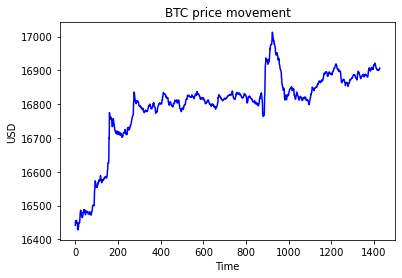

In [142]:
# Plot BTC

plt.figure(1)
plt.plot(data['BTC Adj Close'], color='blue') 
plt.xlabel('Time')
plt.ylabel('USD')
plt.title('BTC price movement')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

In [175]:
data.describe()

,BTC Adj Close,BTC Open,ETH Adj Close,ETH Open
count,1427.000000,1427.000000,1427.000000,1427.000000
mean,16796.228854,16796.228854,1207.044081,1207.044081
std,112.596011,112.596011,12.438526,12.438526
min,16428.060547,16428.060547,1165.599487,1165.599487
25%,16790.927734,16790.927734,1207.622864,1207.622864
50%,16817.783203,16817.783203,1210.976318,1210.976318
75%,16861.663086,16861.663086,1214.714294,1214.714294
max,17012.984375,17012.984375,1224.092651,1224.092651


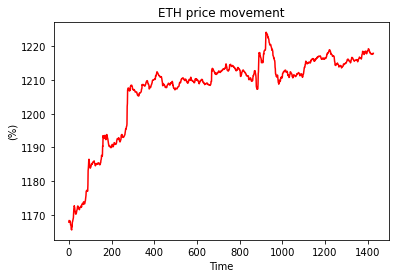

In [143]:
# Plot ETH

plt.figure(1)
plt.plot(data['ETH Adj Close'], color='red') 
plt.xlabel('Time')
plt.ylabel('(%)')
plt.title('ETH price movement')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

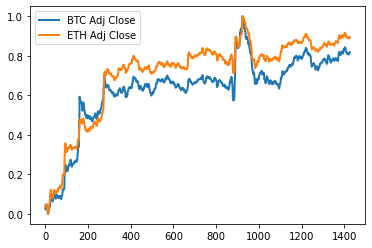

In [144]:
# Plot BTC & ETH together

d_r = data[['BTC Adj Close','ETH Adj Close']]
snorm = d_r.copy()
for v in d_r:
    mi,ma = d_r[v].min(),d_r[v].max()
    snorm[v] = (d_r[v] - mi)/(ma-mi)

snorm.plot(linewidth=2)
plt.show()


In [145]:

S1_0 = data['BTC Open'][0]
S2_0 = data['ETH Open'][0]
print("BTC open price = " , S1_0)
print("ETH open price = " , S2_0)

BTC open price =  16441.787109375
ETH open price =  1167.8826904296875


In [146]:
# Estimation of parameters

lr1 = np.log(data['BTC Adj Close'] / data['BTC Adj Close'].shift(1))
lr2 = np.log(data['ETH Adj Close'] / data['ETH Adj Close'].shift(1))
mu_1 = lr1.mean() * 1427
mu_2 = lr2.mean() * 1427
sigma_1 = lr1.std() * np.sqrt(1427)
sigma_2 = lr2.std() * np.sqrt(1427)
rho = lr1.corr(lr2)
z_0 = 0.00
gamma = 1
delta = 1
T = 1
M = len(BTC)

In [147]:
print ( "correlation factor :", rho , "\nDaily mean of BTC:",mu_1 , "\nDaily mean of ETH:",mu_2 , "\nDaily volatility of BTC:",sigma_1
       ,"\nDaily volatility of ETH:",sigma_2  )

correlation factor : 0.8378936036417076 
Daily mean of BTC: 0.02791867179610483 
Daily mean of ETH: 0.041928238013100694 
Daily volatility of BTC: 0.011114104757123638 
Daily volatility of ETH: 0.012798419905687893


In [148]:
# Estimation of cointegration coefficient, beta
result = linregress(np.log(data['BTC Adj Close']), np.log(data['ETH Adj Close']))
beta = result.slope
print("Beta = ", beta)

Beta =  1.4984144549495024


In [149]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1= np.zeros((M + 1, 1))
Pi_2= np.zeros((M + 1, 1))

In [150]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - (sigma_1 ** 2)/2 + beta*(mu_2 - (sigma_2 ** 2)/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = data['BTC Adj Close'][t-1]
    S2[t] = data['ETH Adj Close'][t-1]
    

Text(0.5, 1.0, 'Crypto Price')

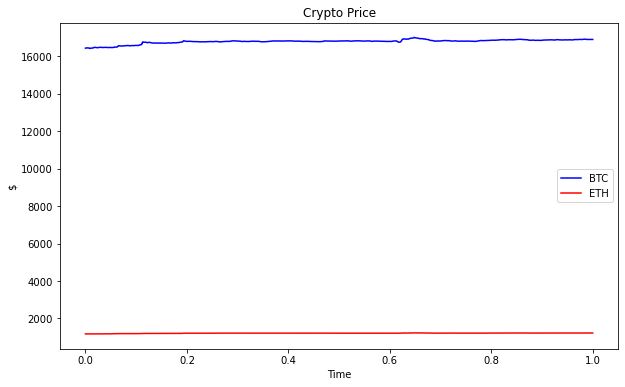

In [151]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Crypto Price')

Text(0.5, 1.0, 'z - cointegration vector')

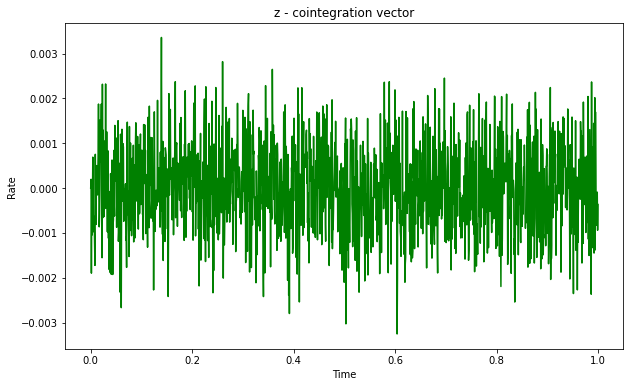

In [152]:
# plotting cointegration vector

plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z - cointegration vector')

In [153]:
# Optimal weights

for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

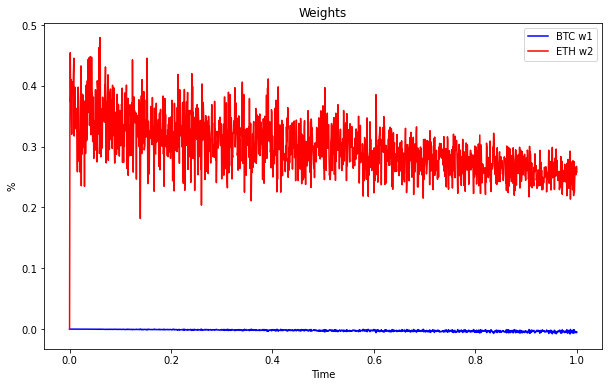

In [154]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='BTC w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='ETH w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

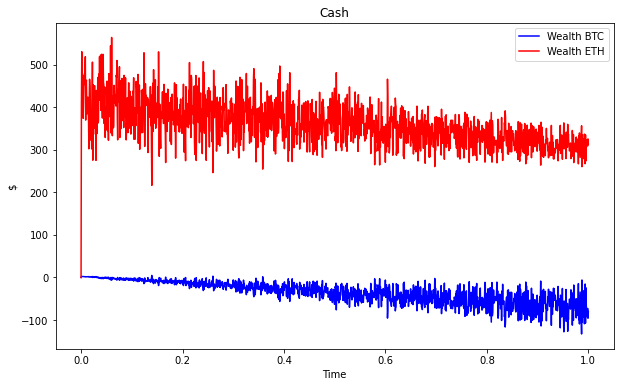

In [155]:
# Cash process

plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth BTC')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [156]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

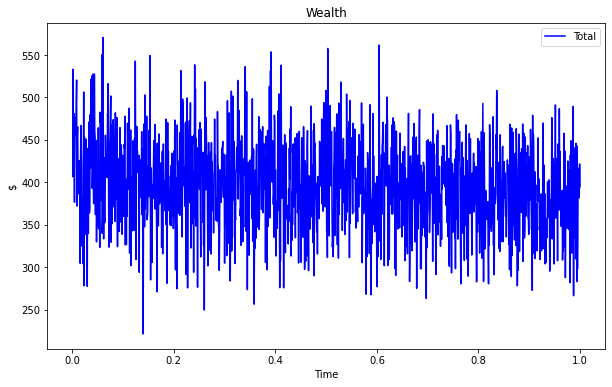

In [157]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [176]:
Pi_1.mean()

-0.0040464008024816605

In [177]:
Pi_2.mean()

0.559794453572997

Text(0.5, 1.0, 'Comparison')

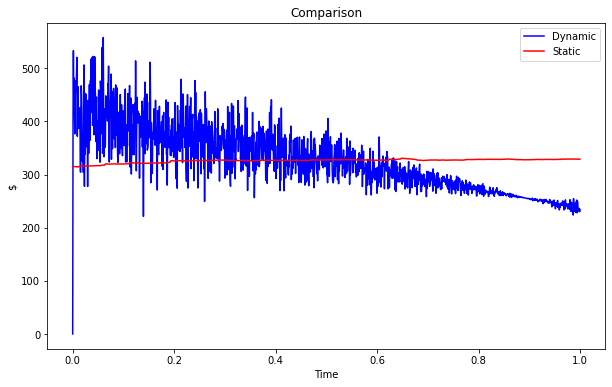

In [158]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [159]:
#Dynamic wealth

Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)
print('Dynamic wealth initial = ', Wealth[1] )
print('Dynamic wealth end = ', Wealth[-1] )
print('Dynamic wealth return = ',(Wealth[-1] - Wealth[1])/Wealth[1])

Dynamic wealth initial =  [406.88768411]
Dynamic wealth end =  [394.72018565]
Dynamic wealth return =  [-0.02990383]


In [160]:
#Static wealth

S_Wealth = abs(Pi_1.mean() * S1) + abs(Pi_2.mean() * S2)
print('Static wealth initial = ', S_Wealth[1] )
print('Static wealth end = ', S_Wealth[-1] )
print('Static wealth return = ',(S_Wealth[-1] - S_Wealth[1])/S_Wealth[1])

Static wealth initial =  [382.26758222]
Static wealth end =  [398.13672011]
Static wealth return =  [0.04151317]


In [191]:
# Simulation of assets

S1_0 = 16200
S2_0 = 1100
mu_1 = 0.03
mu_2 = 0.04
sigma_1 = 0.02
sigma_2 = 0.01
z_0 = 0.00
beta = 1
gamma = 0.8
delta = 0.5
rho = 0.9
T = 1
M = 1440

In [192]:
dt = T/M
S1 = np.zeros((M + 1, 1))
S2 = np.zeros((M + 1, 1))
z =  np.zeros((M + 1, 1))
a =  np.zeros((M + 1, 1))
b =  np.zeros((M + 1, 1))
c =  np.zeros((M + 1, 1))
Pi_1 = np.zeros((M + 1, 1))
Pi_2 = np.zeros((M + 1, 1))

In [193]:
tt = np.linspace(0, 1, M + 1)
z[0] = z_0
S1[0] = S1_0
S2[0] = S2_0
sigma_beta = np.sqrt(sigma_1 ** 2 + beta ** 2 * sigma_2 ** 2 + 2 * beta * sigma_1 * sigma_2 * rho)
eta = (-1/delta) * (mu_1 - sigma_1 ** 2/2 + beta*(mu_2 - sigma_2 ** 2/2))
rn = np.random.standard_normal(z.shape)
rn1 = np.random.standard_normal(S1.shape) 
rn2 = np.random.standard_normal(S2.shape) 
for t in range(1, M + 1):
    z[t] = z[t-1]* (1 - delta * (eta - z[t-1])) * dt + sigma_beta * np.sqrt(dt)*((sigma_1 + beta * sigma_2 * rho)/ sigma_beta * rn1[t] + beta * (sigma_2 * np.sqrt(1-rho ** 2)/sigma_beta) * rn1[t]);
    S1[t] = S1[t-1] * np.exp((mu_1 + delta * z[t] - sigma_1 ** 2 / 2) * dt + sigma_1 * np.sqrt(dt) * rn1[t])
    S2[t] = S2[t-1] * np.exp((mu_2 - sigma_2 ** 2 / 2) * dt + sigma_2 * np.sqrt(dt) * (rho * rn1[t] + np.sqrt(1 - rho ** 2) * rn2[t]))

Text(0.5, 1.0, 'Stock Price')

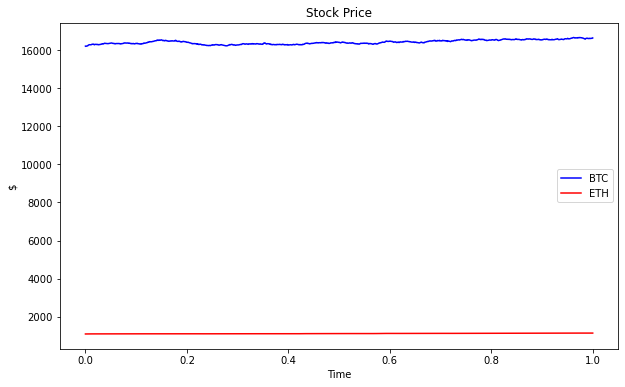

In [194]:
plt.figure(figsize=(10, 6))
plt.plot(tt, S1, 'b', lw=1.5, label='BTC')
plt.plot(tt, S2, 'r', lw=1.5, label='ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Stock Price')

Text(0.5, 1.0, 'z')

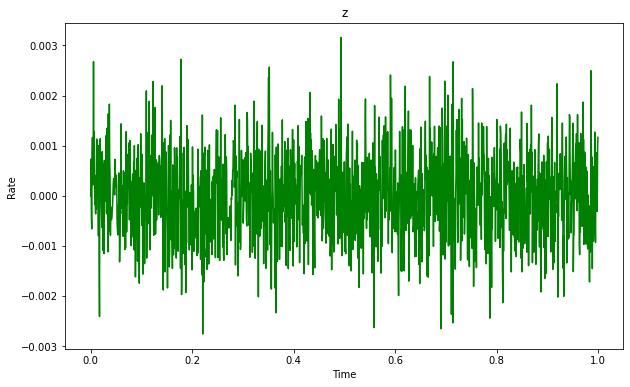

In [195]:
plt.figure(figsize=(10, 6))
plt.plot(tt, z, 'g', lw=1.5)
plt.xlabel('Time')
plt.ylabel('Rate')
plt.title('z')

In [196]:
for t in range(1, M + 1):
    a[t] = 0.5 * (T - t * dt)/((1-rho ** 2) * sigma_1 ** 2)
    b[t] = - 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2)/((1 - rho ** 2) * sigma_1 ** 2) - rho * mu_2 * (T - t * dt)/((1 - rho **2) * sigma_1 * sigma_2)
    c[t] = 0.5 * mu_2 ** 2 * (T - t * dt)/((1 - rho ** 2) * sigma_2 ** 2) + 0.25 * (T - t * dt) ** 2 * (sigma_1 ** 2 + beta * sigma_2 ** 2 + 2 * sigma_1 * sigma_2 * beta *rho) * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2) + 0.25 * (T - t * dt) ** 2 * mu_2 * delta * rho * (sigma_1 ** 2 + beta * sigma_2 ** 2) + 1/24 * (T - t * dt) ** 3 * (sigma_1 ** 2 + beta * sigma_2 ** 2) ** 2 * delta ** 2/((1 - rho ** 2) * sigma_1 ** 2)
    Pi_1[t] = (1 / S1[t]) * ((mu_1 + delta * z[t])/(gamma * (1 - rho ** 2) * sigma_1 ** 2) + delta/gamma * (-2 * a[t] * (mu_1 + delta * z[t])-b[t]) - rho * mu_2/(gamma * (1 - rho ** 2) * sigma_1 * sigma_2))
    Pi_2[t] = (1 / S2[t]) * (mu_2 / (gamma * (1 - rho ** 2) * sigma_2 ** 2) + delta * beta / gamma * (- 2 * a[t] * (mu_1 + delta * z[t]) - b[t]) - rho * (mu_1 + delta * z[t]) / (gamma * (1 - rho ** 2) * sigma_1 * sigma_2))

Text(0.5, 1.0, 'Weights')

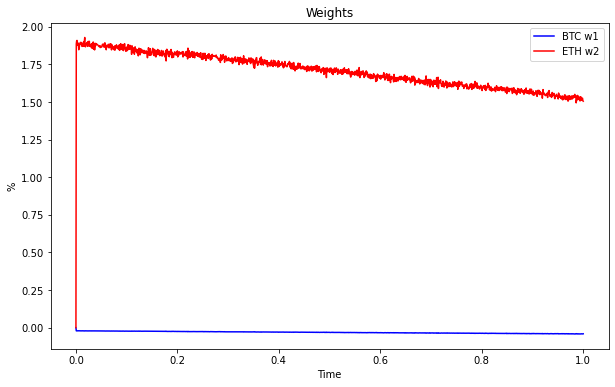

In [197]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1, 'b', lw=1.5, label='BTC w1')
plt.plot(tt, Pi_2, 'r', lw=1.5, label='ETH w2')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('%')
plt.title('Weights')

Text(0.5, 1.0, 'Cash')

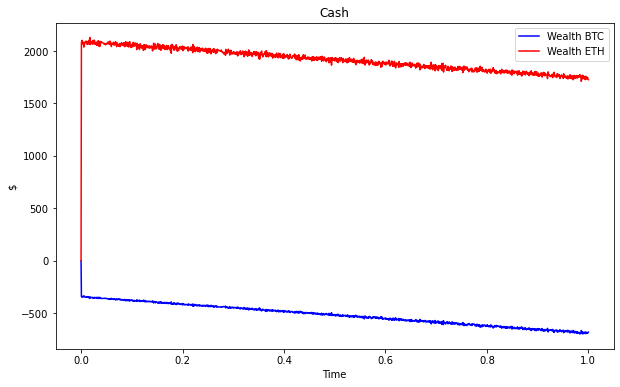

In [198]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1, 'b', lw=1.5, label='Wealth BTC')
plt.plot(tt, Pi_2 * S2, 'r', lw=1.5, label='Wealth ETH')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Cash')

In [199]:
Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)

Text(0.5, 1.0, 'Wealth')

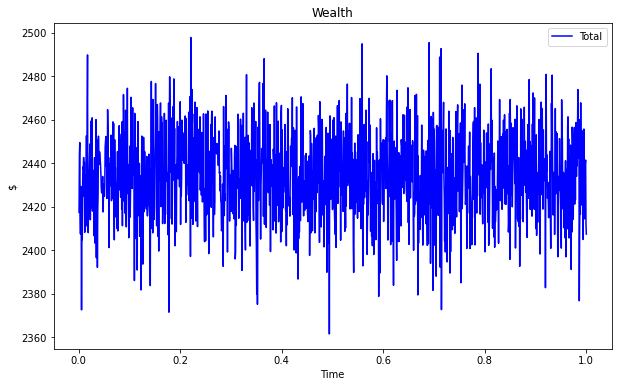

In [200]:
plt.figure(figsize=(10, 6))
plt.plot(tt[1:], Wealth[1:], 'b', lw=1.5, label='Total')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Wealth')

In [201]:
Pi_1.mean()

-0.03150069576505559

In [203]:
Pi_2.mean()

1.7077338383171308

Text(0.5, 1.0, 'Comparison')

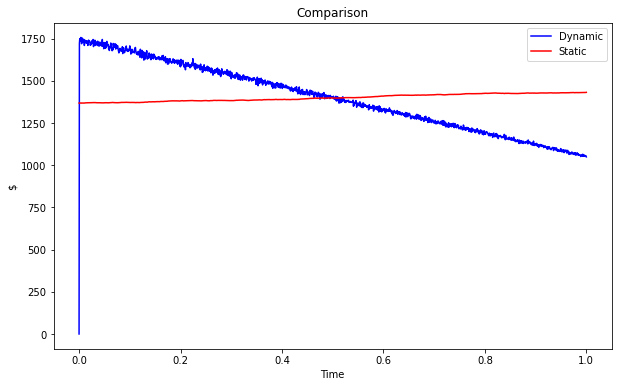

In [188]:
plt.figure(figsize=(10, 6))
plt.plot(tt, Pi_1 * S1 + Pi_2 * S2, 'b', lw=1.5, label='Dynamic')
plt.plot(tt, Pi_1.mean() * S1 + Pi_2.mean() * S2, 'r', lw=1.5, label='Static')
plt.legend(loc=0)
plt.xlabel('Time')
plt.ylabel('$')
plt.title('Comparison')

In [189]:
#Dynamic wealth

Wealth = abs(Pi_1 * S1) + abs(Pi_2 * S2)
print('Dynamic wealth initial = ', Wealth[1] )
print('Dynamic wealth end = ', Wealth[-1] )
print('Dynamic wealth return = ',(Wealth[-1] - Wealth[1])/Wealth[1])

Dynamic wealth initial =  [2396.87405166]
Dynamic wealth end =  [2423.43748298]
Dynamic wealth return =  [0.01108253]


In [190]:
#Static wealth

S_Wealth = abs(Pi_1.mean() * S1) + abs(Pi_2.mean() * S2)
print('Static wealth initial = ', S_Wealth[1] )
print('Static wealth end = ', S_Wealth[-1] )
print('Static wealth return = ',(S_Wealth[-1] - S_Wealth[1])/S_Wealth[1])

Static wealth initial =  [2372.69691731]
Static wealth end =  [2487.13203311]
Static wealth return =  [0.04822998]
